![](images/EscUpmPolit_p.gif "UPM")

# Course Notes for Learning Intelligent Systems

Department of Telematic Engineering Systems, Universidad Politécnica de Madrid, © Carlos A. Iglesias

## [Introduction to  Network Analysis](0_Intro_Network_Analysis.ipynb)

# Network Analysis

## Case study: Zackary's karate club

In [1]:
import networkx as nx
import numpy as np

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [3]:
KCG = nx.karate_club_graph()

In [4]:
pos = nx.spring_layout(KCG)

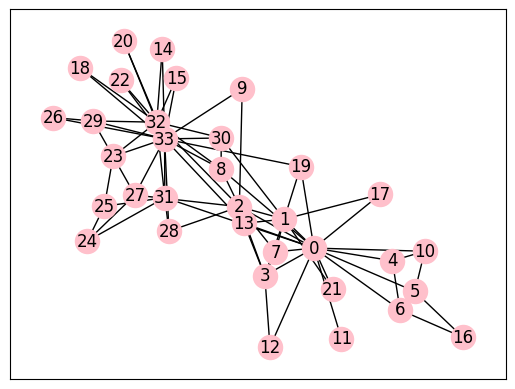

In [5]:
nx.draw_networkx(KCG, pos, node_color='pink')

In [6]:
KCG.nodes(data=True)

NodeDataView({0: {'club': 'Mr. Hi'}, 1: {'club': 'Mr. Hi'}, 2: {'club': 'Mr. Hi'}, 3: {'club': 'Mr. Hi'}, 4: {'club': 'Mr. Hi'}, 5: {'club': 'Mr. Hi'}, 6: {'club': 'Mr. Hi'}, 7: {'club': 'Mr. Hi'}, 8: {'club': 'Mr. Hi'}, 9: {'club': 'Officer'}, 10: {'club': 'Mr. Hi'}, 11: {'club': 'Mr. Hi'}, 12: {'club': 'Mr. Hi'}, 13: {'club': 'Mr. Hi'}, 14: {'club': 'Officer'}, 15: {'club': 'Officer'}, 16: {'club': 'Mr. Hi'}, 17: {'club': 'Mr. Hi'}, 18: {'club': 'Officer'}, 19: {'club': 'Mr. Hi'}, 20: {'club': 'Officer'}, 21: {'club': 'Mr. Hi'}, 22: {'club': 'Officer'}, 23: {'club': 'Officer'}, 24: {'club': 'Officer'}, 25: {'club': 'Officer'}, 26: {'club': 'Officer'}, 27: {'club': 'Officer'}, 28: {'club': 'Officer'}, 29: {'club': 'Officer'}, 30: {'club': 'Officer'}, 31: {'club': 'Officer'}, 32: {'club': 'Officer'}, 33: {'club': 'Officer'}})

In [7]:
mr_hi_nodes = [x for x,y in KCG.nodes(data=True) if y['club']=='Mr. Hi']

In [8]:
print(mr_hi_nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21]


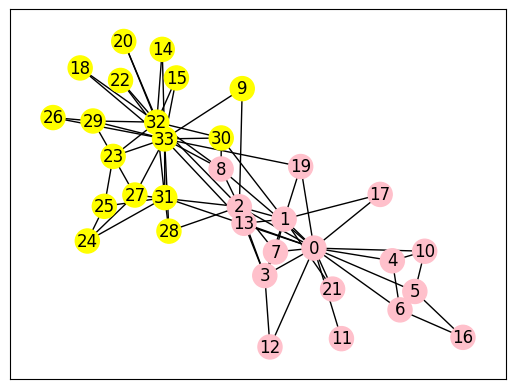

In [9]:
colors = ['yellow' if not node in mr_hi_nodes  else 'pink' for node in KCG.nodes()]
nx.draw_networkx(KCG, pos, node_color=colors)

## Case study: directed graph

In [10]:
D = nx.DiGraph()

In [11]:
D.add_edges_from([('A', 'B'), ('C','A')])

In [12]:
dpos = nx.layout.spring_layout(D)

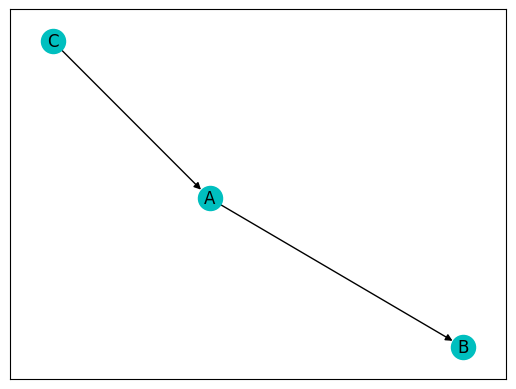

In [13]:
nx.draw_networkx(D, dpos, node_color='c')

## Case study: weighted graph

In [14]:
W = nx.Graph()

In [15]:
W.add_weighted_edges_from([('@user1', '@user2', 5),('@user1', '@user3', 2), ('@user1', '@user4', 4),('@user3', '@user4', 2)]) 

In [16]:
wpos = nx.spring_layout(W)  # positions for all nodes

{('@user1', '@user2'): Text(0.6018955503921715, -0.24679947126373863, '5'),
 ('@user1', '@user3'): Text(-0.17970137346946247, 0.29333141640278315, '2'),
 ('@user1', '@user4'): Text(-0.21840580053176595, -0.1501865110092797, '4'),
 ('@user3', '@user4'): Text(-0.6018896056692925, 0.24679395449426322, '2')}

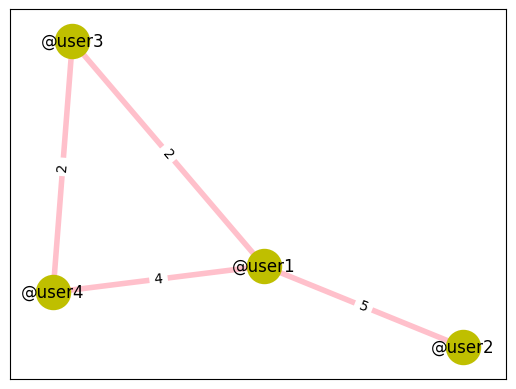

In [17]:
labels = nx.get_edge_attributes(W,'weight')
nx.draw_networkx(W, wpos, node_color='y', node_size=600)
nx.draw_networkx_edges(W,wpos,width=4, edge_color='pink', arrows=False)
nx.draw_networkx_edge_labels(W,wpos,edge_labels=labels)

We will use a helper function to draw the measures

In [18]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# for Notebook
%matplotlib inline

#  Adapted from https://aksakalli.github.io/2017/07/17/network-centrality-measures-and-their-visualization.html
def draw(G, pos, measures, measure_name):
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.YlOrRd, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

## Micro level analysis

### Degree centrality

#### Undirected Graphs

Calculate degree

In [19]:
print(KCG.degree())

[(0, 16), (1, 9), (2, 10), (3, 6), (4, 3), (5, 4), (6, 4), (7, 4), (8, 5), (9, 2), (10, 3), (11, 1), (12, 2), (13, 5), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 3), (20, 2), (21, 2), (22, 2), (23, 5), (24, 3), (25, 3), (26, 2), (27, 4), (28, 3), (29, 4), (30, 4), (31, 6), (32, 12), (33, 17)]


In [20]:
print(KCG.degree(1))

9


#### Normalized centrality

In [21]:
degree = nx.degree_centrality(KCG)
sorted(degree.items(), key=lambda x:x[1], reverse=True)[0:10]

[(33, 0.5151515151515151),
 (0, 0.48484848484848486),
 (32, 0.36363636363636365),
 (2, 0.30303030303030304),
 (1, 0.2727272727272727),
 (3, 0.18181818181818182),
 (31, 0.18181818181818182),
 (8, 0.15151515151515152),
 (13, 0.15151515151515152),
 (23, 0.15151515151515152)]

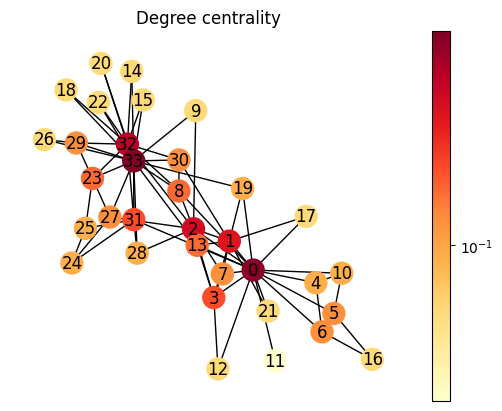

In [22]:
draw(KCG, pos, nx.degree_centrality(KCG), 'Degree centrality')

#### Directed grahps

In [23]:
print(D.degree())

[('A', 2), ('B', 1), ('C', 1)]


In [24]:
print(D.in_degree)

[('A', 1), ('B', 1), ('C', 0)]


In [25]:
print(D.out_degree)

[('A', 1), ('B', 0), ('C', 1)]


#### Weighted graphs

In [26]:
print(W.degree)

[('@user1', 3), ('@user2', 1), ('@user3', 2), ('@user4', 2)]


In [27]:
print(W.degree(weight='weight')) #name of relationship with numeric weight

[('@user1', 11), ('@user2', 5), ('@user3', 4), ('@user4', 6)]


In [28]:
print(W.degree('@user2', weight='weight'))

5


### Betweenness centrality

In [29]:
betweenness = nx.betweenness_centrality(KCG, normalized=False)
sorted(betweenness.items(), key=lambda x:x[1], reverse=True)[0:10]

[(0, 231.0714285714286),
 (33, 160.5515873015873),
 (32, 76.69047619047619),
 (2, 75.85079365079366),
 (31, 73.00952380952378),
 (8, 29.529365079365082),
 (1, 28.478571428571424),
 (13, 24.215873015873015),
 (19, 17.1468253968254),
 (5, 15.833333333333334)]

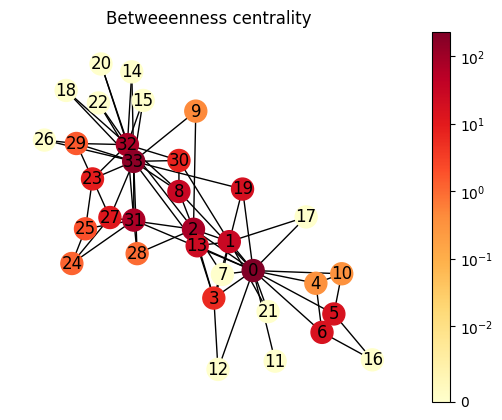

In [30]:
draw(KCG, pos, nx.betweenness_centrality(KCG, normalized=False), 'Betweeenness centrality')

### Closeness centrality

In [31]:
closeness = nx.closeness_centrality(KCG)
sorted(closeness.items(), key=lambda x:x[1], reverse=True)[0:10]

[(0, 0.5689655172413793),
 (2, 0.559322033898305),
 (33, 0.55),
 (31, 0.5409836065573771),
 (8, 0.515625),
 (13, 0.515625),
 (32, 0.515625),
 (19, 0.5),
 (1, 0.4852941176470588),
 (3, 0.4647887323943662)]

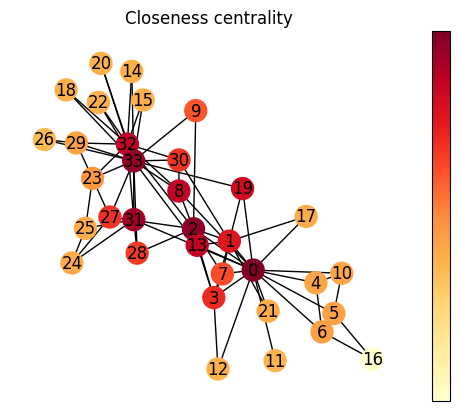

In [32]:
draw(KCG, pos, nx.closeness_centrality(KCG), 'Closeness centrality')

### Eigenvector centrality

In [33]:
eigenvector = nx.eigenvector_centrality(KCG)
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:10]

[(33, 0.37337121301323506),
 (0, 0.35548349418519426),
 (2, 0.3171893899684447),
 (32, 0.3086510477336959),
 (1, 0.2659538704545024),
 (8, 0.22740509147166046),
 (13, 0.22646969838808145),
 (3, 0.21117407832057056),
 (31, 0.191036269797917),
 (30, 0.17476027834493088)]

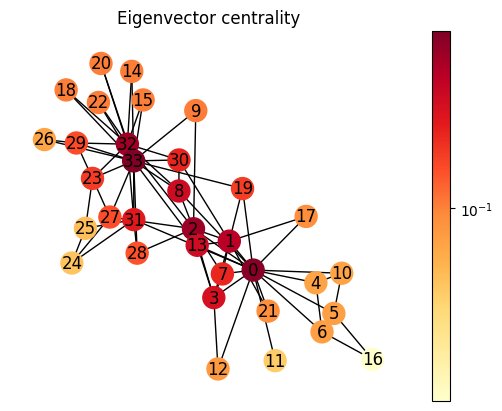

In [34]:
draw(KCG, pos, nx.eigenvector_centrality(KCG), 'Eigenvector centrality')

### Local clustering coefficient

In [35]:
nx.clustering(KCG, 3)

0.6666666666666666

In [36]:
clustering = nx.clustering(KCG)
sorted(clustering.items(), key=lambda x:x[1], reverse=True)[0:10]

[(7, 1.0),
 (12, 1.0),
 (14, 1.0),
 (15, 1.0),
 (16, 1.0),
 (17, 1.0),
 (18, 1.0),
 (20, 1.0),
 (21, 1.0),
 (22, 1.0)]

## Meso analysis. Group level metrics

### Cliques

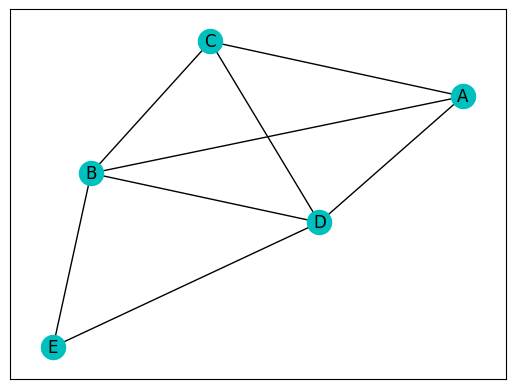

In [37]:
CG = nx.Graph()
CG.add_edges_from([('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('B', 'E'),('C','D'), ('D', 'E')])
nx.draw_networkx(CG, node_color='c')

In [38]:
list(nx.find_cliques(CG))

[['D', 'B', 'A', 'C'], ['D', 'B', 'E']]

[[4, 0, 1, 2, 3], [4, 5], [6, 5], [6, 7], [7, 8, 9, 10, 11]]


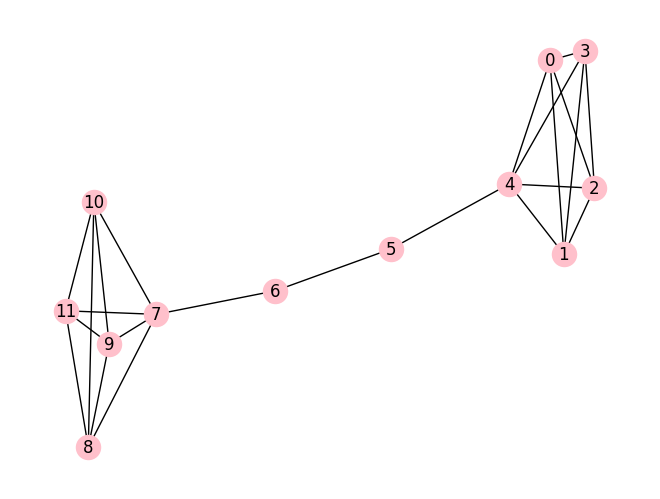

In [39]:
# Another example
BG = nx.barbell_graph(m1=5, m2=2)
gl = list(nx.find_cliques(BG))
print(gl)
nx.draw(BG, node_color='pink', with_labels=True)

###  Community detection

Helper functions

In [40]:
# from Network Science with Python and NetworkX 
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1
            
def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0
def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

Let's calculate the communities

In [41]:
import networkx.algorithms.community as nxcom


result = nxcom.girvan_newman(KCG)
communities = next(result)
len(communities)

2

In [42]:
# Set node and edge communities
set_node_community(KCG, communities)
set_edge_community(KCG)

In [43]:
# Set community color for nodes
node_color = [get_color(KCG.nodes[v]['community']) for v in KCG.nodes]

# Set community color for internal edges
external = [(v, w) for v, w in KCG.edges if KCG.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in KCG.edges if KCG.edges[v, w]['community'] > 0]
internal_color = [get_color(KCG.edges[e]['community']) for e in internal]

Let's see the result

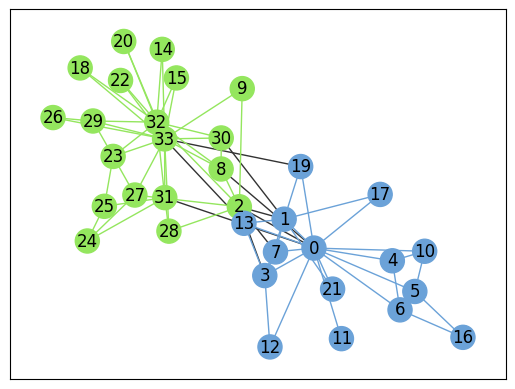

In [44]:
# Draw external edges
nx.draw_networkx(
    KCG, pos=pos, node_size=0,
    edgelist=external, edge_color="#333333", with_labels=False)
# Draw nodes and internal edges
nx.draw_networkx(
    KCG, pos=pos, node_color=node_color,
    edgelist=internal, edge_color=internal_color)

it classifies well most of the nodes (except for 8 and 2).

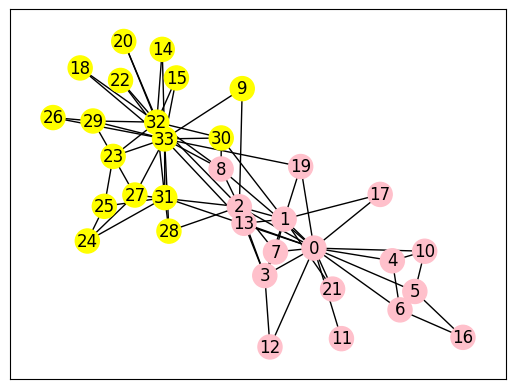

In [45]:
colors = ['yellow' if not node in mr_hi_nodes  else 'pink' for node in KCG.nodes()]
nx.draw_networkx(KCG, pos, node_color=colors)

Alternatively, we can draw with the library *nx_altair* if installed. 

In [46]:
communities = list(nx.community.label_propagation_communities(KCG))
centralities = nx.eigenvector_centrality(KCG)

for f in KCG.nodes():
    for i, c in enumerate(communities):
        if f in c:
            attrs = {f: {"community" : str(i),
                                "centrality" : centralities[f],
                                "name" : f
                               }}
            nx.set_node_attributes(KCG, attrs)

In [47]:
import nx_altair as nxa

nxa.draw_networkx(
    G=KCG,
    pos=pos,
    node_size="centrality",
    node_color='community',
    cmap='accent',
    node_tooltip=['name', 'centrality', "community"]
)

alt.LayerChart(...)

## Macro analysis. Global metrics

### Number of nodes

In [48]:
len(KCG)

34

In [49]:
len(KCG.nodes)

34

In [50]:
len(KCG.nodes())

34

In [51]:
nx.number_of_nodes(KCG)

34

### Number of edges

In [52]:
len(KCG.edges())

78

In [53]:
print(KCG)

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


In [54]:
nx.number_of_edges(KCG)

78

In [55]:
len(list(nx.non_edges(KCG))) ## Number of non-existing edges

483

In [56]:
print(D)

DiGraph with 3 nodes and 2 edges


### Shortest path

In [57]:
list(nx.all_shortest_paths(KCG, 0, 33)) # All shortest paths

[[0, 8, 33], [0, 13, 33], [0, 19, 33], [0, 31, 33]]

In [58]:
nx.shortest_path(KCG, 0, 33) #Just one

[0, 8, 33]

In [59]:
nx.shortest_path_length(KCG, 0, 33) # Minimum distance

2

In [60]:
nx.average_shortest_path_length(KCG) #Average shortest path 

2.408199643493761

In [61]:
nx.diameter(KCG) # Diameter (largest shortest path between 2 nodes)

5

### Transitivity

In [62]:
nx.transitivity(KCG)

0.2556818181818182

### Average local clustering

In [63]:
nx.average_clustering(KCG)

0.5706384782076823

### Density

In [64]:
nx.density(KCG)

0.13903743315508021

In [65]:
# 2 * m / n * (n - 1)

2 * nx.number_of_edges(KCG) / ( nx.number_of_nodes(KCG) * (nx.number_of_nodes(KCG)  - 1))

0.13903743315508021

### Minimal cut

In [66]:
import networkx.algorithms.connectivity as nxcon
nxcon.minimum_node_cut(KCG)

{0}

In [67]:
nxcon.minimum_edge_cut(KCG)

{(11, 0)}

In [68]:
nxcon.minimum_st_node_cut(KCG, 0, 33) #Nodes we should remove to separate nodes 0 and 33 into disconnected halves

{2, 8, 13, 19, 30, 31}

### Connectivity

In [69]:
nx.node_connectivity(KCG) # it is size of the mininum_node_cut()

1

In [70]:
nx.edge_connectivity(KCG) # it is the size of mininum_edge_cut()

1

In [71]:
nx.average_node_connectivity(KCG)

2.2174688057040997

# References
* Networkx tutorial https://networkx.github.io/documentation/stable/tutorial.html
* Network Centrality Measures and Their Visualization, Can Güney Aksakalli, 2017, https://aksakalli.github.io/2017/07/17/network-centrality-measures-and-their-visualization.html

## Licence

The notebook is freely licensed under under the [Creative Commons Attribution Share-Alike license](https://creativecommons.org/licenses/by/2.0/).  

© Carlos A. Iglesias, Universidad Politécnica de Madrid.